In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Loading Dataset


In [117]:
v1_df = pd.read_parquet("hf://datasets/kinisi/gym_kr2-PickYCB-v1_generated/data/chunk-000/episode_000000.parquet")

In [118]:
v1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   observation.images.head_camera  57 non-null     object 
 1   action                          57 non-null     object 
 2   observation.state               57 non-null     object 
 3   timestamp                       57 non-null     float32
 4   frame_index                     57 non-null     int64  
 5   episode_index                   57 non-null     int64  
 6   index                           57 non-null     int64  
 7   task_index                      57 non-null     int64  
dtypes: float32(1), int64(4), object(3)
memory usage: 3.5+ KB


In [119]:
v1_df.head()

,observation.images.head_camera,action,observation.state,timestamp,frame_index,episode_index,index,task_index
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[0.0, 0.0, 0.00096, -0.00096, -0.6, -0.3791001...","[0.018257216, 0.01825725, 0.00011348083, -0.00...",0.000000,0,0,0,0
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[0.0, 0.0, 0.018409671, -0.018409671, -0.6, -0...","[0.0022636736, 0.0022581709, 0.017093448, -0.0...",0.033333,1,0,1,0
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[0.0, 0.0, 0.038400035, -0.038400035, -0.6, -0...","[0.0022636736, 0.0022581709, 0.037060156, -0.0...",0.066667,2,0,2,0
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[0.0, 0.0, 0.0584, -0.0584, -0.6, -0.361041, 0...","[0.0022636736, 0.0022581709, 0.05701695, -0.05...",0.100000,3,0,3,0
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[0.0, 0.0, 0.0784, -0.0784, -0.6, -0.26104364,...","[0.0022636736, 0.0022581709, 0.07722339, -0.07...",0.133333,4,0,4,0


In [120]:
v1_df['observation.state'][0]

array([ 1.8257216e-02,  1.8257249e-02,  1.1348083e-04, -2.8994158e-04,
       -5.9996909e-01, -3.7563673e-01,  4.6909261e-01, -1.7981676e+00,
        1.7981454e+00,  1.8893399e-03, -1.8990268e-03, -1.3425452e+00,
        1.2449249e+00,  1.0007094e+00, -8.9245963e-01,  2.0212786e+00,
       -2.0104916e+00,  3.0897100e+00, -3.0916495e+00,  4.1746971e-06,
       -8.0988502e-06,  2.5658667e-06, -1.4874968e-06, -1.8485051e-06,
       -9.3905965e-06,  3.5244777e-06, -4.2000584e-10,  6.2228332e-07,
        2.4975833e-07,  1.5961911e-06, -1.4405556e-06], dtype=float32)

# Creating New Dataframe from 'observation.state' column

In [121]:
state_df = pd.DataFrame(v1_df['observation.state'].tolist())
state_df.columns = [f'state_{i}' for i in range(state_df.shape[1])]

In [122]:
state_df.head()

,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,...,state_21,state_22,state_23,state_24,state_25,state_26,state_27,state_28,state_29,state_30
0,0.018257,0.018257,0.000113,-0.000290,-0.599969,-0.375637,0.469093,-1.798168,1.798145,0.001889,...,0.000003,-0.000001,-1.848505e-06,-9.390596e-06,3.524478e-06,-4.200058e-10,6.222833e-07,2.497583e-07,1.596191e-06,-0.000001
1,0.002264,0.002258,0.017093,-0.017100,-0.599965,-0.460399,0.389063,-1.714065,1.775322,0.085883,...,0.003857,-0.003854,-1.672838e-06,4.411417e-07,8.706263e-07,-6.068399e-11,-3.849686e-03,3.855643e-03,-3.881168e-06,-0.000002
2,0.002264,0.002258,0.037060,-0.037099,-0.599973,-0.465861,0.311864,-1.614136,1.766498,0.185800,...,0.042323,-0.042319,-9.106772e-07,1.812524e-07,6.959257e-07,-7.182561e-11,-4.231729e-02,4.231977e-02,-2.184701e-06,-0.000001
3,0.002264,0.002258,0.057017,-0.057066,-0.599959,-0.367004,0.225062,-1.514135,1.764801,0.225142,...,0.165622,-0.165615,-1.330728e-06,2.455770e-07,8.137070e-07,-8.340395e-11,-1.656132e-01,1.656151e-01,-3.283876e-06,-0.000002
4,0.002264,0.002258,0.077223,-0.077178,-0.600005,-0.267284,0.136047,-1.414119,1.769840,0.128179,...,0.380568,-0.380563,-1.435122e-06,-3.511445e-06,1.927374e-06,-2.018715e-10,-3.805638e-01,3.805639e-01,-7.682806e-08,-0.000003


In [123]:
state_df.describe()

,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,...,state_21,state_22,state_23,state_24,state_25,state_26,state_27,state_28,state_29,state_30
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,0.002544,0.002539,0.041239,0.007702,-0.600152,0.466922,0.133778,-0.337346,1.814613,-0.561104,...,0.704143,-0.703765,2.759955e-06,-9.833012e-07,2.329375e-07,-2.529101e-11,-7.041077e-01,7.036933e-01,-1.204515e-06,2.986807e-07
std,0.002118,0.002119,0.080850,0.045726,0.000607,0.447057,0.294444,0.531397,0.029696,0.324617,...,0.197604,0.197781,6.138099e-06,2.240670e-06,6.071254e-07,6.846339e-11,1.977623e-01,1.978478e-01,1.749973e-06,1.595879e-06
min,0.002264,0.002258,-0.113544,-0.084494,-0.601983,-0.465861,-0.545920,-1.798168,1.764801,-1.153835,...,0.000003,-0.800000,-1.848505e-06,-1.274407e-05,-4.381903e-07,-4.200058e-10,-8.001591e-01,2.497583e-07,-6.467917e-06,-2.785195e-06
25%,0.002264,0.002258,-0.000133,-0.000290,-0.600012,0.090680,0.002392,-0.507676,1.802428,-0.823051,...,0.660025,-0.800000,-4.541735e-07,-1.147773e-06,-4.039888e-08,-3.574721e-11,-8.001498e-01,6.572571e-01,-1.948299e-06,-7.258632e-07
50%,0.002264,0.002258,0.011280,0.000098,-0.599993,0.488823,0.216540,-0.075047,1.809809,-0.647167,...,0.799814,-0.800000,2.202850e-08,-1.482319e-08,2.380891e-09,-5.641585e-13,-8.001398e-01,8.001060e-01,-5.683173e-07,4.454382e-09
75%,0.002264,0.002258,0.090827,0.021414,-0.599968,0.764582,0.224825,-0.018588,1.812617,-0.465370,...,0.799817,-0.657820,3.459180e-06,7.217038e-08,3.406610e-07,3.702724e-12,-6.587783e-01,8.001087e-01,-2.291417e-08,7.469035e-07
max,0.018257,0.018257,0.222065,0.125484,-0.598716,1.232980,0.720408,0.105970,1.901299,0.225142,...,0.799818,-0.000001,3.327007e-05,5.202824e-07,3.524478e-06,5.292945e-11,6.222833e-07,8.001101e-01,2.599583e-06,6.777074e-06


In [124]:
state_v1 = pd.concat([v1_df[['timestamp', 'task_index', 'episode_index']],state_df],axis=1)

In [125]:
state_v1.head()

,timestamp,task_index,episode_index,state_0,state_1,state_2,state_3,state_4,state_5,state_6,...,state_21,state_22,state_23,state_24,state_25,state_26,state_27,state_28,state_29,state_30
0,0.000000,0,0,0.018257,0.018257,0.000113,-0.000290,-0.599969,-0.375637,0.469093,...,0.000003,-0.000001,-1.848505e-06,-9.390596e-06,3.524478e-06,-4.200058e-10,6.222833e-07,2.497583e-07,1.596191e-06,-0.000001
1,0.033333,0,0,0.002264,0.002258,0.017093,-0.017100,-0.599965,-0.460399,0.389063,...,0.003857,-0.003854,-1.672838e-06,4.411417e-07,8.706263e-07,-6.068399e-11,-3.849686e-03,3.855643e-03,-3.881168e-06,-0.000002
2,0.066667,0,0,0.002264,0.002258,0.037060,-0.037099,-0.599973,-0.465861,0.311864,...,0.042323,-0.042319,-9.106772e-07,1.812524e-07,6.959257e-07,-7.182561e-11,-4.231729e-02,4.231977e-02,-2.184701e-06,-0.000001
3,0.100000,0,0,0.002264,0.002258,0.057017,-0.057066,-0.599959,-0.367004,0.225062,...,0.165622,-0.165615,-1.330728e-06,2.455770e-07,8.137070e-07,-8.340395e-11,-1.656132e-01,1.656151e-01,-3.283876e-06,-0.000002
4,0.133333,0,0,0.002264,0.002258,0.077223,-0.077178,-0.600005,-0.267284,0.136047,...,0.380568,-0.380563,-1.435122e-06,-3.511445e-06,1.927374e-06,-2.018715e-10,-3.805638e-01,3.805639e-01,-7.682806e-08,-0.000003


In [126]:
state_v1.isnull().sum()

timestamp        0
task_index       0
episode_index    0
state_0          0
state_1          0
state_2          0
state_3          0
state_4          0
state_5          0
state_6          0
state_7          0
state_8          0
state_9          0
state_10         0
state_11         0
state_12         0
state_13         0
state_14         0
state_15         0
state_16         0
state_17         0
state_18         0
state_19         0
state_20         0
state_21         0
state_22         0
state_23         0
state_24         0
state_25         0
state_26         0
state_27         0
state_28         0
state_29         0
state_30         0
dtype: int64

In [127]:
scaler = StandardScaler()
state_df = scaler.fit_transform(state_df)
state_df = pd.DataFrame(state_df, columns=[f'state_{i}' for i in range(state_df.shape[1])])

In [128]:
state_df.describe().round(3)

,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,...,state_21,state_22,state_23,state_24,state_25,state_26,state_27,state_28,state_29,state_30
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,...,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,...,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000
std,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,...,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009
min,-0.134,-0.134,-1.931,-2.034,-3.042,-2.105,-2.329,-2.773,-1.692,-1.842,...,-3.595,-0.491,-0.757,-5.295,-1.115,-5.817,-0.490,-3.588,-3.034,-1.950
25%,-0.134,-0.134,-0.516,-0.176,0.233,-0.849,-0.450,-0.323,-0.414,-0.814,...,-0.225,-0.491,-0.528,-0.074,-0.454,-0.154,-0.490,-0.237,-0.429,-0.648
50%,-0.134,-0.134,-0.374,-0.168,0.264,0.049,0.284,0.498,-0.163,-0.267,...,0.488,-0.491,-0.450,0.436,-0.383,0.364,-0.490,0.492,0.367,-0.186
75%,-0.134,-0.134,0.619,0.303,0.306,0.672,0.312,0.605,-0.068,0.298,...,0.488,0.234,0.115,0.475,0.179,0.427,0.231,0.492,0.681,0.283
max,7.483,7.483,2.256,2.599,2.385,1.729,2.010,0.842,2.945,2.444,...,0.488,3.590,5.015,0.677,5.470,1.153,3.592,0.492,2.193,4.096


# Visualising Data

In [129]:
pca = PCA(n_components=2)
state_pca = pca.fit_transform(state_df)

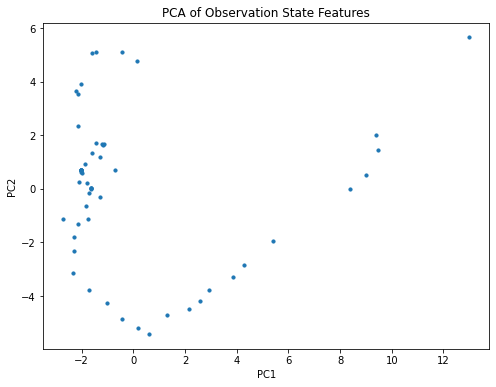

In [130]:
plt.figure(figsize=(8,6))
plt.scatter(state_pca[:, 0], state_pca[:, 1], s=10)
plt.title("PCA of Observation State Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Clustering Data

In [131]:
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(state_df)

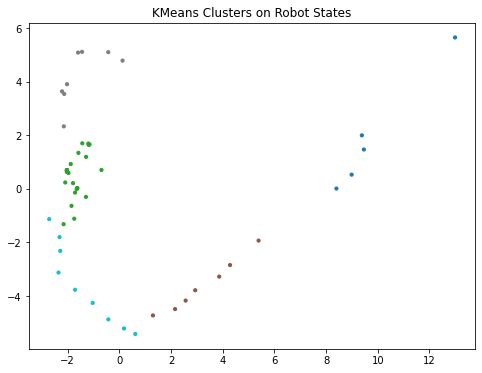

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(state_pca[:, 0], state_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.title("KMeans Clusters on Robot States")
plt.show()

# Anomaly Detection

In [133]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(state_df.values) 
print(anomaly_labels)

[-1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


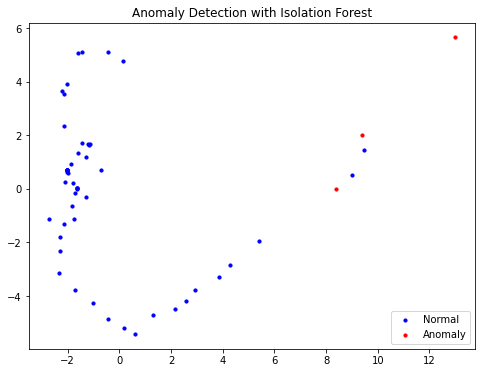

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(state_pca[anomaly_labels == 1, 0], state_pca[anomaly_labels == 1, 1], color='blue', label='Normal', s=10)
plt.scatter(state_pca[anomaly_labels == -1, 0], state_pca[anomaly_labels == -1, 1], color='red', label='Anomaly', s=10)
plt.title("Anomaly Detection with Isolation Forest")
plt.legend()
plt.show()